<a href="https://colab.research.google.com/github/scrambler07/Task_2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##Summary Statistics

In [ ]:
summary_stats = df.describe(include=[np.number]).T
summary_stats = summary_stats[['mean', '50%', 'std', 'min', 'max']]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)
print("Summary Statistics:\n", summary_stats, "\n")

Summary Statistics:
                    mean    median         std   min       max
PassengerId  446.000000  446.0000  257.353842  1.00  891.0000
Survived       0.383838    0.0000    0.486592  0.00    1.0000
Pclass         2.308642    3.0000    0.836071  1.00    3.0000
Age           29.699118   28.0000   14.526497  0.42   80.0000
SibSp          0.523008    0.0000    1.102743  0.00    8.0000
Parch          0.381594    0.0000    0.806057  0.00    6.0000
Fare          32.204208   14.4542   49.693429  0.00  512.3292 



##Histograms

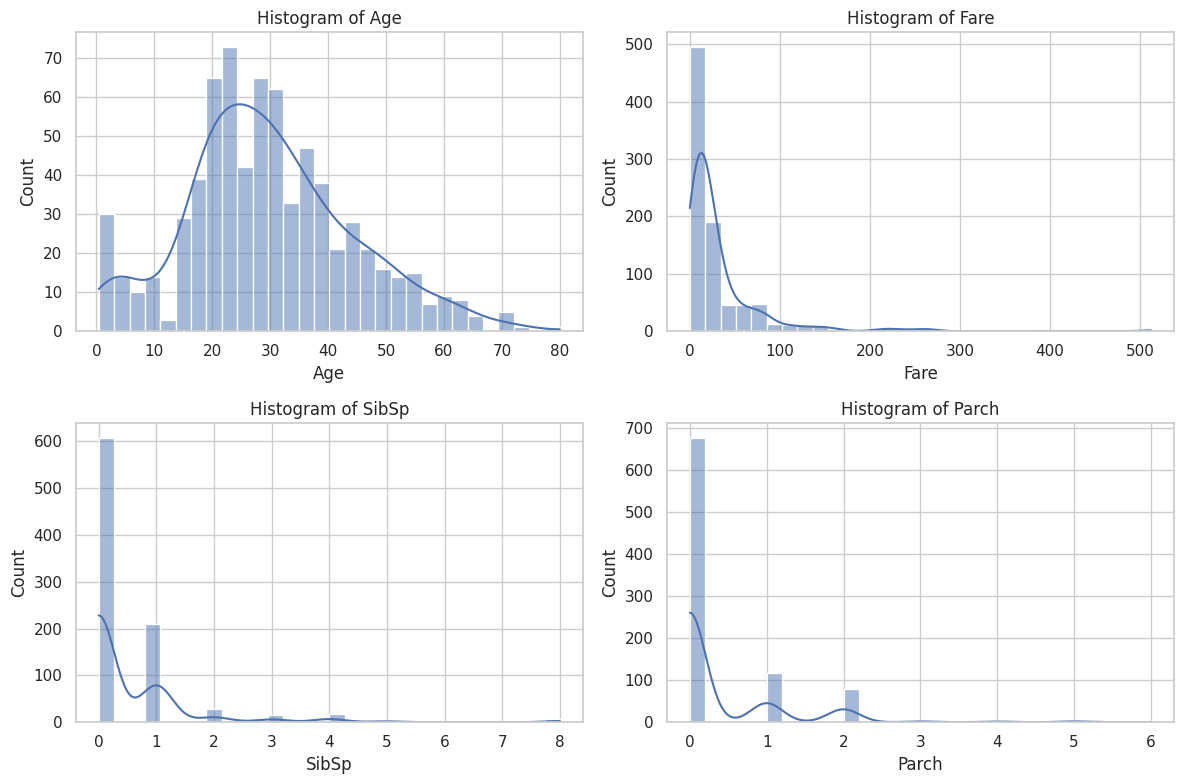

In [ ]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

##Boxplots

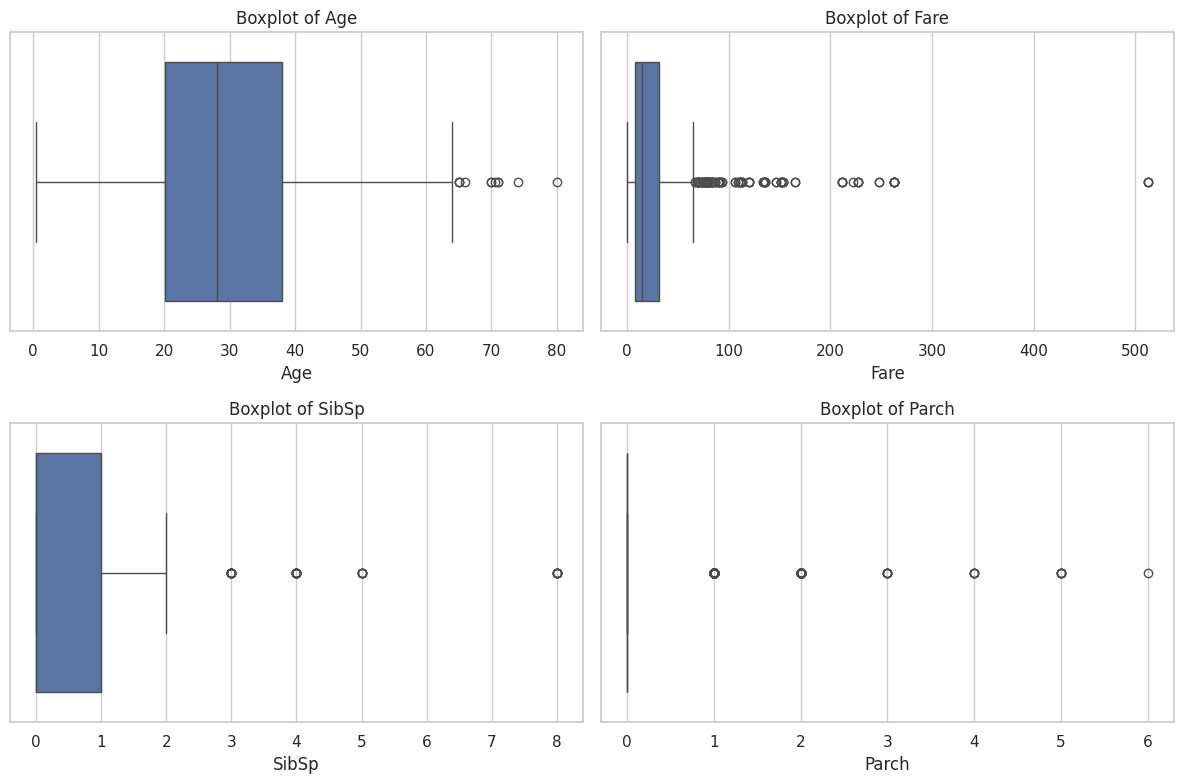

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

##Pairplot

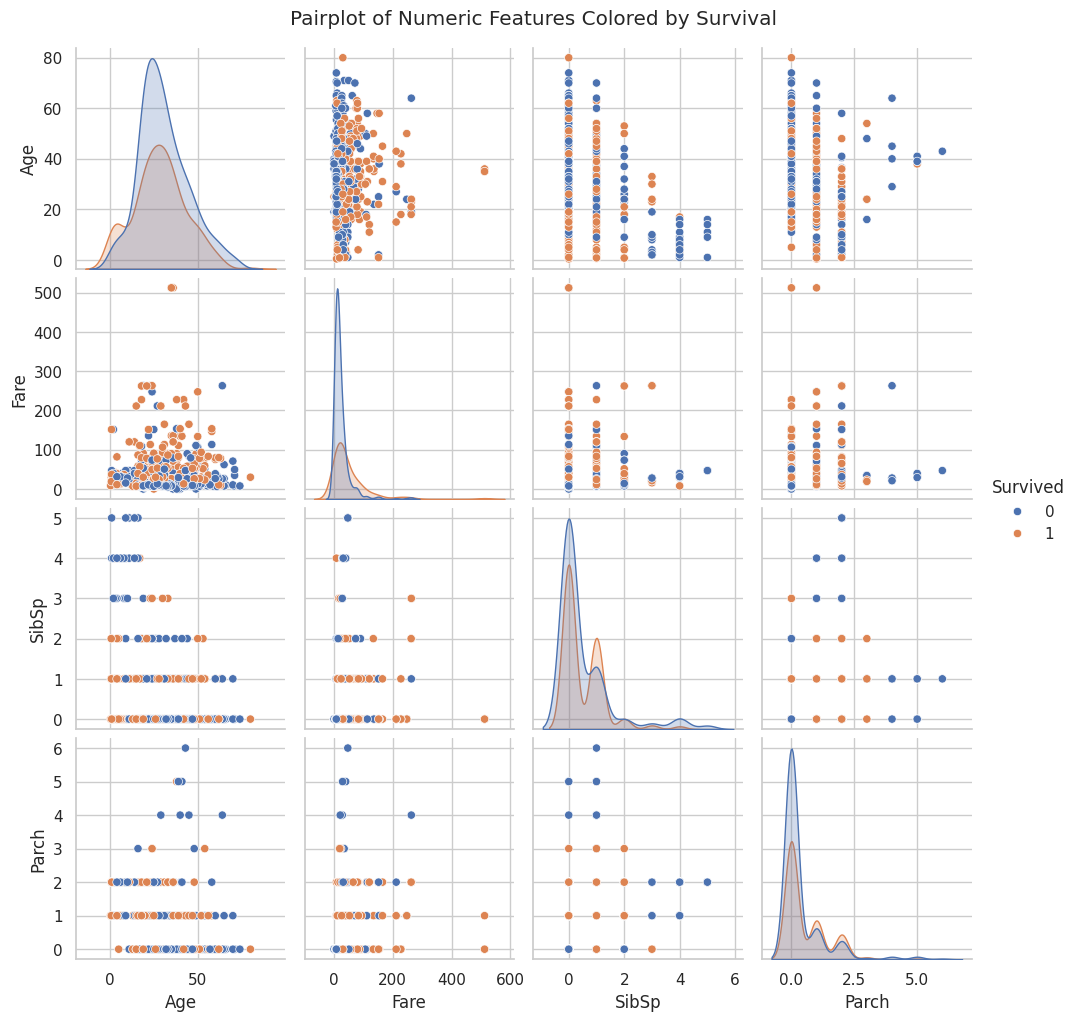

In [ ]:
sns.pairplot(df[numeric_cols + ['Survived']].dropna(), hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features Colored by Survival", y=1.02)
plt.show()

##Correlation matrix

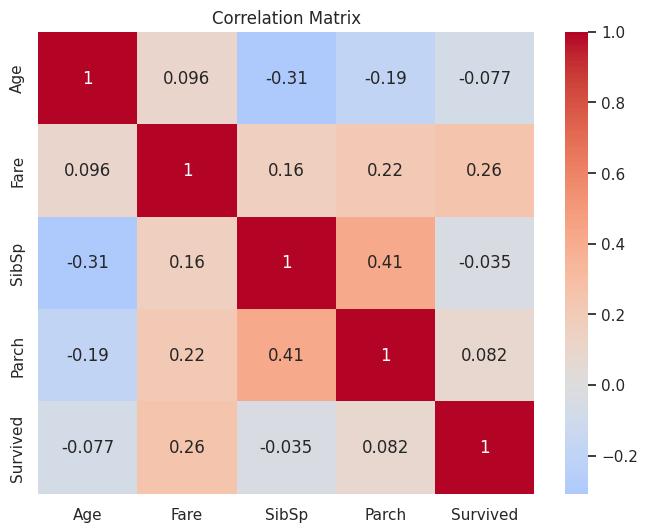

In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix = df[numeric_cols + ['Survived']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()